# Part 2: Feature Engineering

### Content List
- [Imports](#Imports)
- [Check Data Types](#Check-Data-Types)
- [User-Submitted Text Features](#User-Submitted-Text-Features)
- [Ordinal Rankings](#Ordinal-Rankings)
- [One-Hot Encoding](#One-Hot-Encoding)
- [Interaction Features](#Interaction-Features)


### Imports
Similar imports as in Part 1

In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
data_ = pd.read_csv('./dataset/cleaned.csv')

In [3]:
data = data_

### Check Data Types
This is an important step as we need to have a clear idea of which how many object columns remain as we need to get them into an interpretable format. 

In [4]:
data.dtypes.value_counts()

float64    54
object     15
int64       2
Name: count, dtype: int64

In [5]:
object_cols = data.select_dtypes(include='object').columns
object_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

The dataset will undergo the following encoding and transformation processes to prepare it for analysis and modeling:  

1. **Binarization**:  
   The following features will be binarized:  
   - `term`  
   - `verification_status`  
   - `payment_plan`  
   - `application_type`  
   - `hardship_flag`  
   - `disbursement_method`  
   - `debt_settlement_flag`  

2. **One-Hot Encoding**:  
   The following features will be one-hot encoded:  
   - `home_ownership`  
   - `purpose`  
   - `addr_state`  

3. **Ordinal Encoding**:  
   The following features will be encoded based on ordinal rank:  
   - `emp_length`  
   - `grade`  

4. **Text Feature Transformation**:  
   - The text columns `desc`, `emp_title`, and `title` will be measured by their length.  
   - These lengths will then be combined into a single feature for potential use in Natural Language Processing (NLP) tasks.  

5. **DateTime Conversion**:  
   - The text columns `issue_d` and `earliest_cr_line` will be converted into DateTime format.  
   - A new column will be created to represent the difference between these dates, which will then be converted into an integer for modeling purposes.  


In [6]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'n

### User-Submitted Text Features

#### build an aggregate column of all text input

In [7]:
desc_length = []

[desc_length.append(len(i)) for i in data.desc]
    
data["desc_length"]= desc_length

In [8]:
data['desc_length'].head()

0    3
1    3
2    3
3    3
4    3
Name: desc_length, dtype: int64

In [9]:
data['all_text'] = data['desc'] + " " + data['emp_title'] + " " + data['title']

In [10]:
data['all_text'].head()

0                  .  leadman Debt consolidation
1                           .  Engineer Business
2                            .  truck driver  . 
3          .  Contract Specialist Major purchase
4     .  Veterinary Tecnician Debt consolidation
Name: all_text, dtype: object

#### Using List Comprehension, measure the lengths of each item dealing with user text input and return that as a new column

In [11]:
all_text_length = [len(i) for i in data['all_text']]
    
data["all_text_length"] = all_text_length

In [12]:
data['all_text_length'].value_counts()

all_text_length
38      60580
30      57492
39      56927
37      55074
35      51277
        ...  
782         1
817         1
937         1
999         1
1094        1
Name: count, Length: 973, dtype: int64

In [13]:
data.emp_title.head()

0                 leadman
1                Engineer
2            truck driver
3     Contract Specialist
4    Veterinary Tecnician
Name: emp_title, dtype: object

In [14]:
desc_length = [len(i) for i in data.desc]
    
data["desc_length"]= desc_length

In [15]:
emp_title_length = [len(i) for i in data.emp_title]

data["emp_title_length"] = emp_title_length

In [16]:
title_length = [len(i) for i in data.title]
    
data["title_length"] = title_length

### Ordinal Rankings
converting grade G:1 to A:7

In [17]:
#building a dictionary of values to identify and replace grade-  G:1 to A:7
length_dict = {'A':7,
               'B': 6,               
               'C': 5,
               'D': 4,
               'E': 3,
               'F': 2,
               'G': 1,}
data['grade'].replace(length_dict, inplace=True)

In [18]:
data['grade'].head()

0    5
1    5
2    6
3    2
4    5
Name: grade, dtype: int64

In [19]:
#building a dictionary of values to identify and replace
length_dict = {'10+ years':10,
        '2 years': 2,
        '< 1 year': 0,
        '3 years': 3,
        '1 year': 1,
        '5 years': 5,
        '4 years': 4,
        '6 years': 6,
        '8 years': 8,
        '7 years': 7,
        '9 years': 9}
data['emp_length'].replace(length_dict, inplace=True)

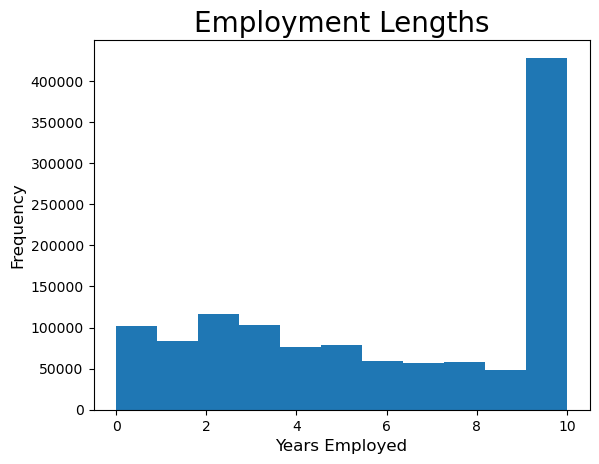

In [20]:
plt.hist(data['emp_length'], bins=11)
plt.title('Employment Lengths', size=20);
plt.xlabel('Years Employed', size=12);
plt.ylabel('Frequency', size=12);

In [21]:
data['emp_length'].value_counts(normalize=True)

emp_length
10    0.353633
2     0.095727
3     0.084659
0     0.084487
1     0.069488
5     0.065368
4     0.062566
6     0.048762
8     0.048173
7     0.046742
9     0.040395
Name: proportion, dtype: float64

In [22]:
data['emp_length'].mean()

5.997059226727756

In [23]:
# Find the mean employment length of people whose loans did or did not succeed.

data.groupby(by='classes')['emp_length'].mean()

classes
0    5.860851
1    6.033932
Name: emp_length, dtype: float64

### One-Hot Encoding
- purpose
- verification_status
- addr_state
- pymnt_plan
- initial_list_status
- application_type
- hardship_flag
- disbursement_method
- debt_settlement_flag

In [24]:
len(data.columns)

76

In [25]:
## all remaining object cols
object_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [26]:
data['term'].head()

0     36 months
1     36 months
2     60 months
3     60 months
4     36 months
Name: term, dtype: object

#### Purpose

In [27]:
data['purpose'].value_counts()

purpose
debt_consolidation    710586
credit_card           270419
home_improvement       76917
other                  66739
major_purchase         25060
medical                13252
small_business         12448
car                    11737
moving                  8085
vacation                7788
house                   6281
wedding                  848
renewable_energy         746
Name: count, dtype: int64

In [28]:
data.groupby(by='classes')['purpose'].value_counts(normalize= True)

classes  purpose           
0        debt_consolidation    0.617561
         credit_card           0.188380
         other                 0.059608
         home_improvement      0.057523
         major_purchase        0.020580
         small_business        0.015711
         medical               0.011843
         moving                0.007896
         car                   0.007400
         vacation              0.006299
         house                 0.005974
         renewable_energy      0.000744
         wedding               0.000481
1        debt_consolidation    0.578500
         credit_card           0.232778
         home_improvement      0.065144
         other                 0.053899
         major_purchase        0.020726
         medical               0.010701
         car                   0.010313
         small_business        0.008810
         vacation              0.006467
         moving                0.006347
         house                 0.004974
         wed

In [29]:
one_hot = ['purpose', 'term',
'verification_status',
'pymnt_plan',
'application_type',
'hardship_flag', 'addr_state',
'disbursement_method', 
'debt_settlement_flag', 'home_ownership']

In [30]:
data = pd.get_dummies(data= data, columns = one_hot, drop_first=True)

In [31]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'annual_inc', 'desc',
       ...
       'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'disbursement_method_DirectPay', 'debt_settlement_flag_Y',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object', length=141)

In [32]:
len(data.columns)

141

## Interaction Features

In [33]:
numeric_data = data.select_dtypes(include='number')
dataCorr = numeric_data.corr(method='pearson')
# dataCorr = data.corr(method='pearson')
dataCorr = dataCorr[abs(dataCorr) >= 0.8].stack().reset_index()
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]


In [34]:
# filtering out lower/upper triangular duplicates 
dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)

In [35]:
dataCorr = pd.DataFrame(dataCorr)

dataCorr.columns=['Initial', 'Secondary', 'Corr_Values']
#generate absolute value of corr values
dataCorr['Abs_Corr_Values'] = abs(dataCorr['Corr_Values'])
# initial_cols = list(dataCorr['Initial'])

# secondary_cols = list(dataCorr['Secondary'])

In [36]:
dataCorr = dataCorr.sort_values(by= 'Abs_Corr_Values', ascending = False)
dataCorr = dataCorr.iloc[6:]
dataCorr

,Initial,Secondary,Corr_Values,Abs_Corr_Values
109,desc_length,all_text_length,0.984275,0.984275
74,num_actv_rev_tl,num_rev_tl_bal_gt_0,0.981772,0.981772
55,tot_cur_bal,tot_hi_cred_lim,0.976269,0.976269
42,recoveries,collection_recovery_fee,0.975954,0.975954
13,int_rate,grade,-0.954909,0.954909
7,funded_amnt,installment,0.952267,0.952267
3,loan_amnt,installment,0.952266,0.952266
11,funded_amnt_inv,installment,0.952221,0.952221
103,total_bal_ex_mort,total_il_high_credit_limit,0.874174,0.874174
35,revol_util,bc_util,0.856119,0.856119


To address issues of autocorrelation and high collinearity within the dataset, new columns will be created for features that exhibit strong correlations with each other. This transformation will aim to consolidate the shared information and reduce redundancy, potentially improving the performance and interpretability of the resulting models.

In [37]:
for i,j in zip(dataCorr['Initial'], dataCorr['Secondary']):
    name = i + '*' + j  
    data[name] = data[i] * data[j]
    print(name)

desc_length*all_text_length
num_actv_rev_tl*num_rev_tl_bal_gt_0
tot_cur_bal*tot_hi_cred_lim
recoveries*collection_recovery_fee
int_rate*grade
funded_amnt*installment
loan_amnt*installment
funded_amnt_inv*installment
total_bal_ex_mort*total_il_high_credit_limit
revol_util*bc_util
bc_util*percent_bc_gt_75
tot_cur_bal*avg_cur_bal
num_bc_tl*num_rev_accts
last_fico_range_high*last_fico_range_low
open_acc*num_op_rev_tl
num_op_rev_tl*num_sats
num_actv_bc_tl*num_bc_sats
num_actv_bc_tl*num_actv_rev_tl
avg_cur_bal*tot_hi_cred_lim
num_actv_bc_tl*num_rev_tl_bal_gt_0


In [38]:
#all of the values in this column are 0 since they are non-overlapping binary values
data.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace= True)

In [39]:
len(data.columns)

159

In [40]:
data.head()

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,annual_inc,desc,title,dti,...,bc_util*percent_bc_gt_75,tot_cur_bal*avg_cur_bal,num_bc_tl*num_rev_accts,last_fico_range_high*last_fico_range_low,open_acc*num_op_rev_tl,num_op_rev_tl*num_sats,num_actv_bc_tl*num_bc_sats,num_actv_bc_tl*num_actv_rev_tl,avg_cur_bal*tot_hi_cred_lim,num_actv_bc_tl*num_rev_tl_bal_gt_0
0,3600.0,13.99,123.03,5,leadman,10,55000.0,.,Debt consolidation,5.91,...,0.00,2.999658e+09,45.0,315840.0,28.0,28.0,4.0,8.0,3.685813e+09,8.0
1,24700.0,11.99,820.28,5,Engineer,10,65000.0,.,Business,16.06,...,208.67,1.989386e+09,459.0,485805.0,440.0,440.0,65.0,25.0,3.056327e+09,25.0
2,20000.0,10.78,432.66,6,truck driver,10,63000.0,.,.,10.78,...,2795.00,5.997713e+09,28.0,492800.0,24.0,24.0,4.0,6.0,6.905722e+09,6.0
3,10400.0,22.45,289.91,2,Contract Specialist,3,104433.0,.,Major purchase,25.37,...,4650.00,9.170344e+09,171.0,492800.0,84.0,84.0,20.0,24.0,1.215147e+10,24.0
4,11950.0,13.44,405.18,5,Veterinary Tecnician,4,34000.0,.,Debt consolidation,10.20,...,9100.00,3.276288e+07,8.0,573045.0,20.0,20.0,4.0,6.0,4.326400e+07,6.0


In [41]:
data.shape

(1210906, 159)

In [42]:
data.to_csv('./dataset/cleaned_FEATURES.csv', index=False)

With the completion of the Feature Engineering stage, including the addition of the engineered columns, the next step is to export the refined dataframe as a CSV file. This will allow for smooth integration into the third and final notebook, where the modeling process will take place.